In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv("squid_game.csv")

In [18]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [19]:
data.drop(columns="user_description", axis = 1, inplace = True)

In [20]:
data.isnull().sum()

user_name              4
user_location      23870
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
source                 0
is_retweet             0
dtype: int64

In [21]:
data.drop(columns="user_location", axis = 1, inplace = True)

In [22]:
data.isnull().sum()

user_name          4
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
source             0
is_retweet         0
dtype: int64

In [23]:
data.dropna(inplace = True)

In [24]:
import nltk
import re
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def clean(text):
    text = str(text).lower()
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub("<.*?>","", text)
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub("\n","",text)
    text = re.sub("\w*\d\w","",text)
    text = [word for word in text.split(" ") if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(" ")]
    text = " ".join(text)
    return text
data["text"] = data["text"].apply(clean)

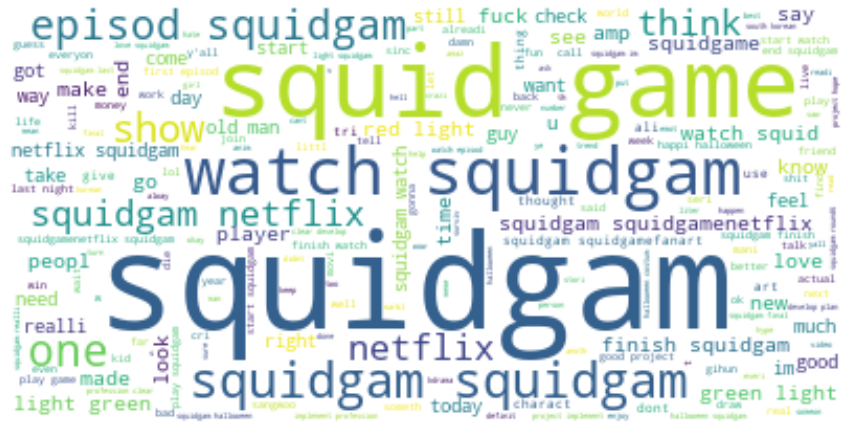

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [29]:
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data.text]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data.text]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data.text]
data = data[["text","Positive","Negative","Neutral"]]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,Positive,Negative,Neutral
0,life hit time poverti strike yougong yoo let ...,0.173,0.108,0.719
1,marbl episod squidgam ruin 😭😭😭,0.000,0.487,0.513
2,squidgam time,0.000,0.000,1.000
3,blood slideim join squidgam thing im alreadi d...,0.142,0.277,0.581
4,two first game player kill mask guy bloodi ni...,0.000,0.461,0.539


In [30]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive :)")
    elif (b>a) and (b>c):
        print("Negative :(")
    else:
        print("Neutral :|")
sentiment_score(x, y, z)

Neutral :|


In [31]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  10548.941999999759
Negative:  5154.693000000032
Neutral:  64310.36800000292
